## Data Preparation

In [1]:
# Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [2]:
# Download the data and read it with pandas 
df = pd.read_csv('data.csv')

In [3]:
# Check Data
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
# Make column names uniform 
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [6]:
df = df[['make', 'model', 'year', 'engine_hp',
       'engine_cylinders', 'transmission_type',  'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp']]

In [7]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_12700\1075441397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].str.lower().str.replace(' ', '_')


In [9]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [10]:
df.rename(columns = {'msrp':'price'}, inplace = True)

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_12700\274309102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'msrp':'price'}, inplace = True)


In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [12]:
# Check Missing values
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
dtype: int64

In [13]:
df['engine_hp'] = df['engine_hp'].fillna(0)
df['engine_cylinders'] = df['engine_cylinders'].fillna(0)

C:\Users\DELL PC\AppData\Local\Temp\ipykernel_12700\2668219026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_hp'] = df['engine_hp'].fillna(0)
C:\Users\DELL PC\AppData\Local\Temp\ipykernel_12700\2668219026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_cylinders'] = df['engine_cylinders'].fillna(0)


In [14]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column transmission_type?

In [15]:
df.transmission_type.mode()

0    automatic
Name: transmission_type, dtype: object

### Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

In [16]:
numerical_features = df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]

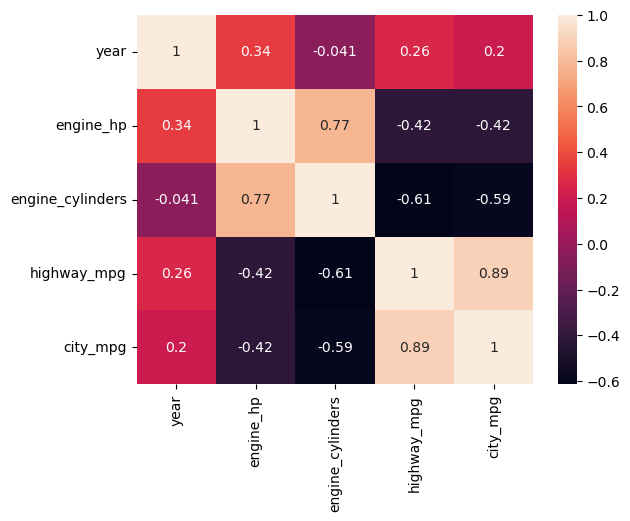

In [17]:
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The Two features with the biggest correlation is highway_mpg and city_mpg with correlation of 0.89

### Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.\
Round the scores to 2 decimals using round(score, 2).

In [18]:
df1 = df.copy()

In [19]:
price_mean = df1.price.mean()
price_mean

40594.737032063116

In [20]:
df1['above_average'] = (df1.price > price_mean).astype(int)

In [21]:
df1.above_average.head()

0    1
1    1
2    0
3    0
4    0
Name: above_average, dtype: int32

In [22]:
df1.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0


## Setting Validation Framework

In [23]:
# Perform train/validation/test data split with Scikit-Learn
df_full_train, df_test = train_test_split(df1, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
#Check lengths of train/validation/test data
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [25]:
# Reset index numbering
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
#Target Columns
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [27]:
# Delete the target variable from the train/validation/test data
del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [28]:
df_full_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,mercedes-benz,clk-class,2007,382.0,8.0,automatic,coupe,22,15,54900,1
1,nissan,370z,2016,332.0,6.0,manual,coupe,26,18,29990,0
2,gmc,sierra_1500,2017,285.0,6.0,automatic,extended_cab_pickup,24,18,32230,0
3,porsche,911,2016,350.0,6.0,manual,convertible,26,19,102930,1
4,volkswagen,gti,2013,200.0,4.0,manual,4dr_hatchback,31,21,28795,0


In [29]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,toyota,highlander_hybrid,2016,280.0,6.0,automatic,4dr_suv,28,27
1,chevrolet,impala_limited,2014,300.0,6.0,automatic,sedan,30,18
2,buick,regal,2016,259.0,4.0,automatic,sedan,27,19
3,volkswagen,cc,2015,280.0,6.0,automated_manual,sedan,25,17
4,dodge,grand_caravan,2016,283.0,6.0,automatic,passenger_minivan,25,17


In [30]:
df_full_train.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
above_average        0
dtype: int64

In [31]:
categorical = ['make', 'model', 'transmission_type',  'vehicle_style']

In [32]:
numerical = [ 'year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg' ]

In [33]:
# Mutual Information
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.above_average)


In [34]:
mutual_info = df_full_train[categorical].apply(mutual_info_price_score)
score = mutual_info.sort_values(ascending=False)

In [35]:
score

model                0.461397
make                 0.238883
vehicle_style        0.082659
transmission_type    0.019411
dtype: float64

In [36]:
 round(score.min(), 2)

0.02

transmission_type has the lowest mutual information score (0.02) 

### Question 4
Now let's train a logistic regression.\
Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.\
Fit the model on the training dataset.\
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:\
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)\
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

## One-Hot Coding

In [37]:
# USe Scikit-Learn to encode categorical features

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## Logistic Regression

In [38]:
# Train a model with Scikit-Learn
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [39]:
y_pred = model.predict_proba(X_val)[:, 1]

In [40]:
#Setting Decision 
decision = (y_pred >= 0.5)

In [41]:
# Model Accuracy
model_accuracy = (y_val == decision).mean()
model_accuracy

0.9353755770037767

In [42]:
model_accuracy = np.round(model_accuracy, 2)
model_accuracy

0.94

Model Accuarcy is 0.94

### Question 5
Let's find the least useful feature using the feature elimination technique.\
Train a model with all these features (using the same parameters as in Q4).\
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.\
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.\
Which of following feature has the smallest difference?

In [43]:
feature = categorical + numerical
feature

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [44]:
orig_accuracy = model_accuracy

for v in feature:
    subset = feature.copy()
    subset.remove(v)
    
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    decision = (y_pred >= 0.5)
    
    subset_accuracy = (y_val == decision).mean()
    
    print(v, orig_accuracy - subset_accuracy, subset_accuracy)

make 0.018052874527905938 0.921947125472094
model 0.02938313050776331 0.9106168694922366
transmission_type -0.007125472093999163 0.9471254720939991
vehicle_style -0.0012505245488879657 0.9412505245488879
year -0.010482584976919895 0.9504825849769198
engine_hp 0.016374318086445627 0.9236256819135543
engine_cylinders 8.392782207211624e-06 0.9399916072177927
highway_mpg 0.00042803189257234475 0.9395719681074276
city_mpg 0.0033655056651279436 0.936634494334872


Transmission Type makes the smallest difference

### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn.\
We'll need to use the original column price. Apply the logarithmic transformation to this column.\
Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.\
This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].\
Round your RMSE scores to 3 decimal digits.\
Which of these alphas leads to the best RMSE on the validation set?

In [45]:
df2 = df.copy()

In [46]:
df2['log_price'] = np.log1p(df2['price'])

In [47]:
df_full_train, df_test = train_test_split(df2, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [48]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values

In [49]:
df2.columns


Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'log_price'],
      dtype='object')

In [50]:
del df_train['log_price']
del df_val['log_price']
del df_test['log_price']

del df_train['price']
del df_val['price']
del df_test['price']

## Ridge Regression

In [51]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [52]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 1981252975540.52
0.01 0.225
0.1 0.217
1 0.231
10 0.322


0.1 has the best RMSE